# Using pre-trained embeddings

## Install `anc2vec` package

In [ ]:
!pip3 install -U pip > /dev/null
!pip3 install -U "anc2vec @ git+https://github.com/aedera/anc2vec.git" > /dev/null

  Running command git clone -q https://github.com/aedera/anc2vec.git /tmp/pip-install-lt3hdhuv/anc2vec_1b18d42f946e4048867917e565955dad


## Load embeddings

This command loads embeddings constructed using the Gene Ontology (release 2020-10-06).

In [ ]:
import anc2vec
embeds = anc2vec.get_embeddings()

## Retrieving embeddings


In [ ]:
embeds['GO:0001780']

array([ 0.55203265, -0.23133564,  0.1983797 , -0.3251996 ,  0.20564775,
       -0.32133245, -0.25364587, -0.16675541, -0.46832997, -0.40702957,
       -0.0873375 , -0.31255123,  0.21853212, -0.23443316,  0.29934332,
       -0.28383982, -0.41982067, -0.21407397, -0.36336198, -0.21446162,
        0.41194695, -0.25694677,  0.20185658, -0.11861248, -0.2565916 ,
       -0.36906996, -0.39008674, -0.3004449 , -0.35822818, -0.37389165,
        0.2137229 , -0.37333834,  0.14497578, -0.23230654,  0.39553115,
        0.4735052 ,  0.36913154, -0.16290289,  0.2194309 , -0.30572593,
        0.26810315, -0.17395245,  0.3182136 , -0.12777388,  0.32668477,
       -0.3070236 ,  0.3788477 , -0.25539076, -0.2754244 ,  0.3055507 ,
       -0.3344264 ,  0.3904205 , -0.21383607,  0.19237018,  0.24540633,
       -0.2503321 , -0.27165422, -0.3038103 ,  0.1473993 ,  0.2575735 ,
       -0.3533151 , -0.27241638, -0.24932317, -0.21835163,  0.22360924,
       -0.2705398 ,  0.18488185, -0.3506352 , -0.21811526, -0.41

## Calculating cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cosim

# similarity between two identical embeddings
emb_a = embeds['GO:0001780']

print(cosim([emb_a], [emb_a]))

# similarity between two root terms
emb_a = embeds['GO:0008150'] # root term in BP
emb_b = embeds['GO:0003674'] # root term in MF

print(cosim([emb_a], [emb_b]))

# similarity between two children of the same parent
emb_a = embeds['GO:0044423'] # one child of GO:0005575
emb_b = embeds['GO:0032991'] # another child of GO:0005575

print(cosim([emb_a], [emb_b]))

[[0.99999994]]
[[-0.02235877]]
[[0.45403188]]


## Visualizing embeddings weights

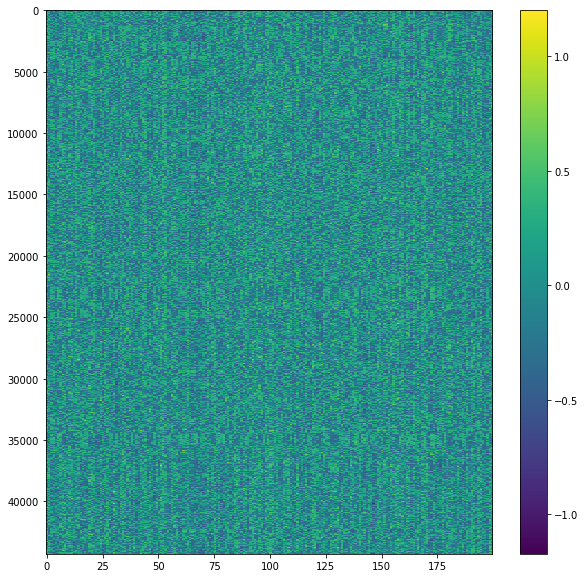

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# make a matrix where rows are all the embeddings
allembeds = np.asarray(list(embeds.values()))

plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(allembeds, interpolation='none', aspect='auto')
plt.colorbar()
plt.show()